# Object Extraction using Computer Vision

In this notebook we are going to see how to extract an object using computer vision. Instead of the foreground-background substraction, we are going to identify the object and extract it using its contour. 

Before diving into coding, we should first observer properties of the object of interest. You see, we should give time to analyse the spatial and texture properties because before formulating the algorithm, one must know if one's algorithm is going to be consistent throught all the possible schemes in which the object may appear. 

The spatial analysis gives us an idea about how big or small the objects are in comparision to one another. This comes handy while the contouring process.

The choice of native algorithms to find the object depends on the shape and color of the object. For example:

- If we know that the object we are trying to locate has a regular shape, i.e. rectangle or some other shape and its texture has one of the primary color as the dominant color, it makes immense sense to opt a **CV** based technique.

- However, if we are dealing with loaction identification of more or less real life object like the wonderful creature called human in an image, it would be suffice to say that the permutation and combinations would make us use a more flexible **ML** algorithm.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets read the image and see what kind of objects are present in the image.

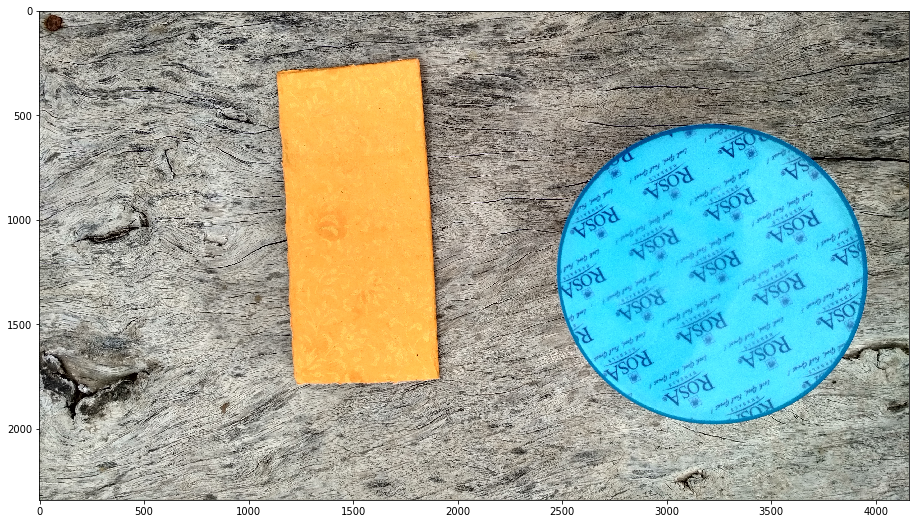

In [2]:
image  = cv2.imread("cld_2.jpg")
rgb_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(18,9))
y = fig.add_subplot(1,1,1)
y.imshow(rgb_im)
plt.show()

Pretty sick background right?!!!

Anyway, so I have these two objects in the image which I need to extract. As we can see, one of them is orange while the other is pretty blue. As stated earlier, locating these object is pretty simple.

We are going to segment the object based on the HSV channel. I have linked the script that I use to findout HSV range *[here](link!)

Just for fun I am going to show you how much HSV Channels are able to differentiate the objects.
What we will try to do:
- Segment such that the threshold is cleared by both the objects
- Segment in a way that only either of the objects can be identified 

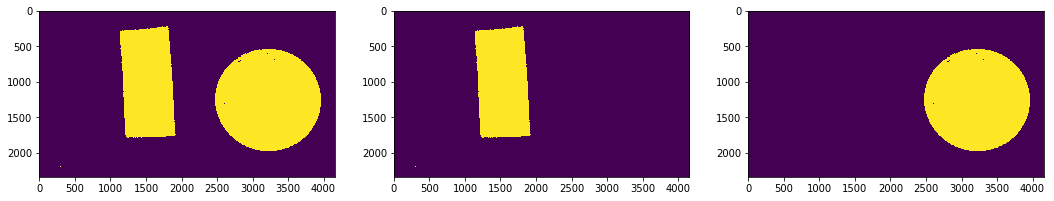

In [3]:

mark_hsv_l = [0,68,132]
mark_hsv_h = [255,255,255]
hsv_marker = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mark_hsv_l = np.array(mark_hsv_l,np.uint8)
mark_hsv_h = np.array(mark_hsv_h,np.uint8)
frame_threshed = cv2.inRange(hsv_marker, mark_hsv_l, mark_hsv_h)


mark_hsv_l = [0,68,132]
mark_hsv_h = [62,255,255]
hsv_marker_ = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mark_hsv_l = np.array(mark_hsv_l,np.uint8)
mark_hsv_h = np.array(mark_hsv_h,np.uint8)
frame_threshed_ = cv2.inRange(hsv_marker_, mark_hsv_l, mark_hsv_h)


mark_hsv_l = [50,68,132]
mark_hsv_h = [255,255,255]
hsv_marker_ = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mark_hsv_l = np.array(mark_hsv_l,np.uint8)
mark_hsv_h = np.array(mark_hsv_h,np.uint8)
frame_threshed__ = cv2.inRange(hsv_marker_, mark_hsv_l, mark_hsv_h)


fig=plt.figure(figsize=(18,9))
y=fig.add_subplot(1,3,1)
y.imshow(frame_threshed)

y=fig.add_subplot(1,3,2)
y.imshow(frame_threshed_)

y=fig.add_subplot(1,3,3)
y.imshow(frame_threshed__)

plt.show()

In the first image as you can see both the objects can been seen while the following images have one object each. The point is that we can quite easily get the object's contour!

Let's find the contours and do some masking.

In [4]:
_,contours,hierarchy=cv2.findContours(frame_threshed__,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# Max area cnt in the above image will be of the marker for sure
cnt = max(contours, key=cv2.contourArea)

Now that we have our contour we are gonna paste on a blank mask and after doing a **Bitwise And** operation with the original image, we will see the object itself.

The mask has the contour pasted on it. So when we do the bitwiseAnd operation with the original image, the mask will act as an eliminator which will make all other stuff go black except the pixels of the object

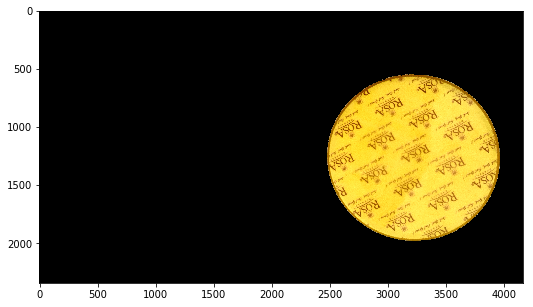

In [5]:
mask = np.zeros(image.shape[:2],np.uint8)
cv2.drawContours(mask,[cnt],-1,(255,255,255),-1)
res = cv2.bitwise_and(image,image,mask = mask)


fig=plt.figure(figsize=(12,5))
y=fig.add_subplot(1,1,1)
y.imshow(res)

See, it's that easy!

 Let's fit a rectangle around that cicular thingy(no offense Rosa!) And we will be left with fully extracted object.

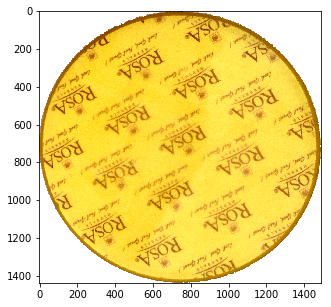

In [6]:
image_=image.copy()
image_[mask == 0] = [255, 255, 255]
x, y, w, h = cv2.boundingRect(cnt)
roi = image_[y:y+h, x:x+w]

fig=plt.figure(figsize=(12,5))
y=fig.add_subplot(1,1,1)
y.imshow(roi)

Repeat this same process as a summary for the other object!

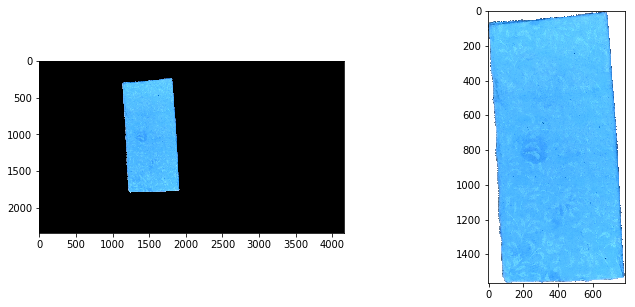

In [7]:

_,contours,hierarchy=cv2.findContours(frame_threshed_,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)
mask = np.zeros(image.shape[:2],np.uint8)
cv2.drawContours(mask,[cnt],-1,(255,255,255),-1)
res = cv2.bitwise_and(image,image,mask = mask)



image[mask == 0] = [255, 255, 255]
x, y, w, h = cv2.boundingRect(cnt)
roi = image[y:y+h, x:x+w]



fig=plt.figure(figsize=(12,5))
y=fig.add_subplot(1,2,1)
y.imshow(res)

y=fig.add_subplot(1,2,2)
y.imshow(roi)

So above we have extracted the blue looking object which actually is golden red in color. Anyway, this is how you can extarct an object based on its color. See you in the next one!